# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Bike Demand EDA & Visualization</b></p>


<div class="alert alert-block alert-info alert">

    
As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.

The aim of this work is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.</span>


<div class="alert alert-block alert-success ">

## <span style=" color:red">Determines 
    
Features
    
- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.
    
"weather_code" category description:

- 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
- 2 = scattered clouds / few clouds
- 3 = Broken clouds
- 4 = Cloudy
- 7 = Rain/ light Rain shower/ Light rain
- 10 = rain with thunderstorm
- 26 = snowfall
- 94 = Freezing Fog
    
Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc. Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.
    
# <span style=" color:red">Tasks
</span>





<div class="alert alert-warning alert-info">
<span style=" color:red">1. Import Libraries
</span>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


<div class="alert alert-warning alert-info">
<span style=" color:red">2. Read Dataset
</span>

In [3]:
df = pd.read_csv('store_sharing.csv')


<div class="alert alert-warning alert-info">
<span style=" color:red">3. Check missing values and if there are any dublicate rows or not.
</span>

In [10]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values


timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [11]:

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
duplicate_rows

0

<div class="alert alert-warning alert-info">
<span style=" color:red">4. Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)
</span>


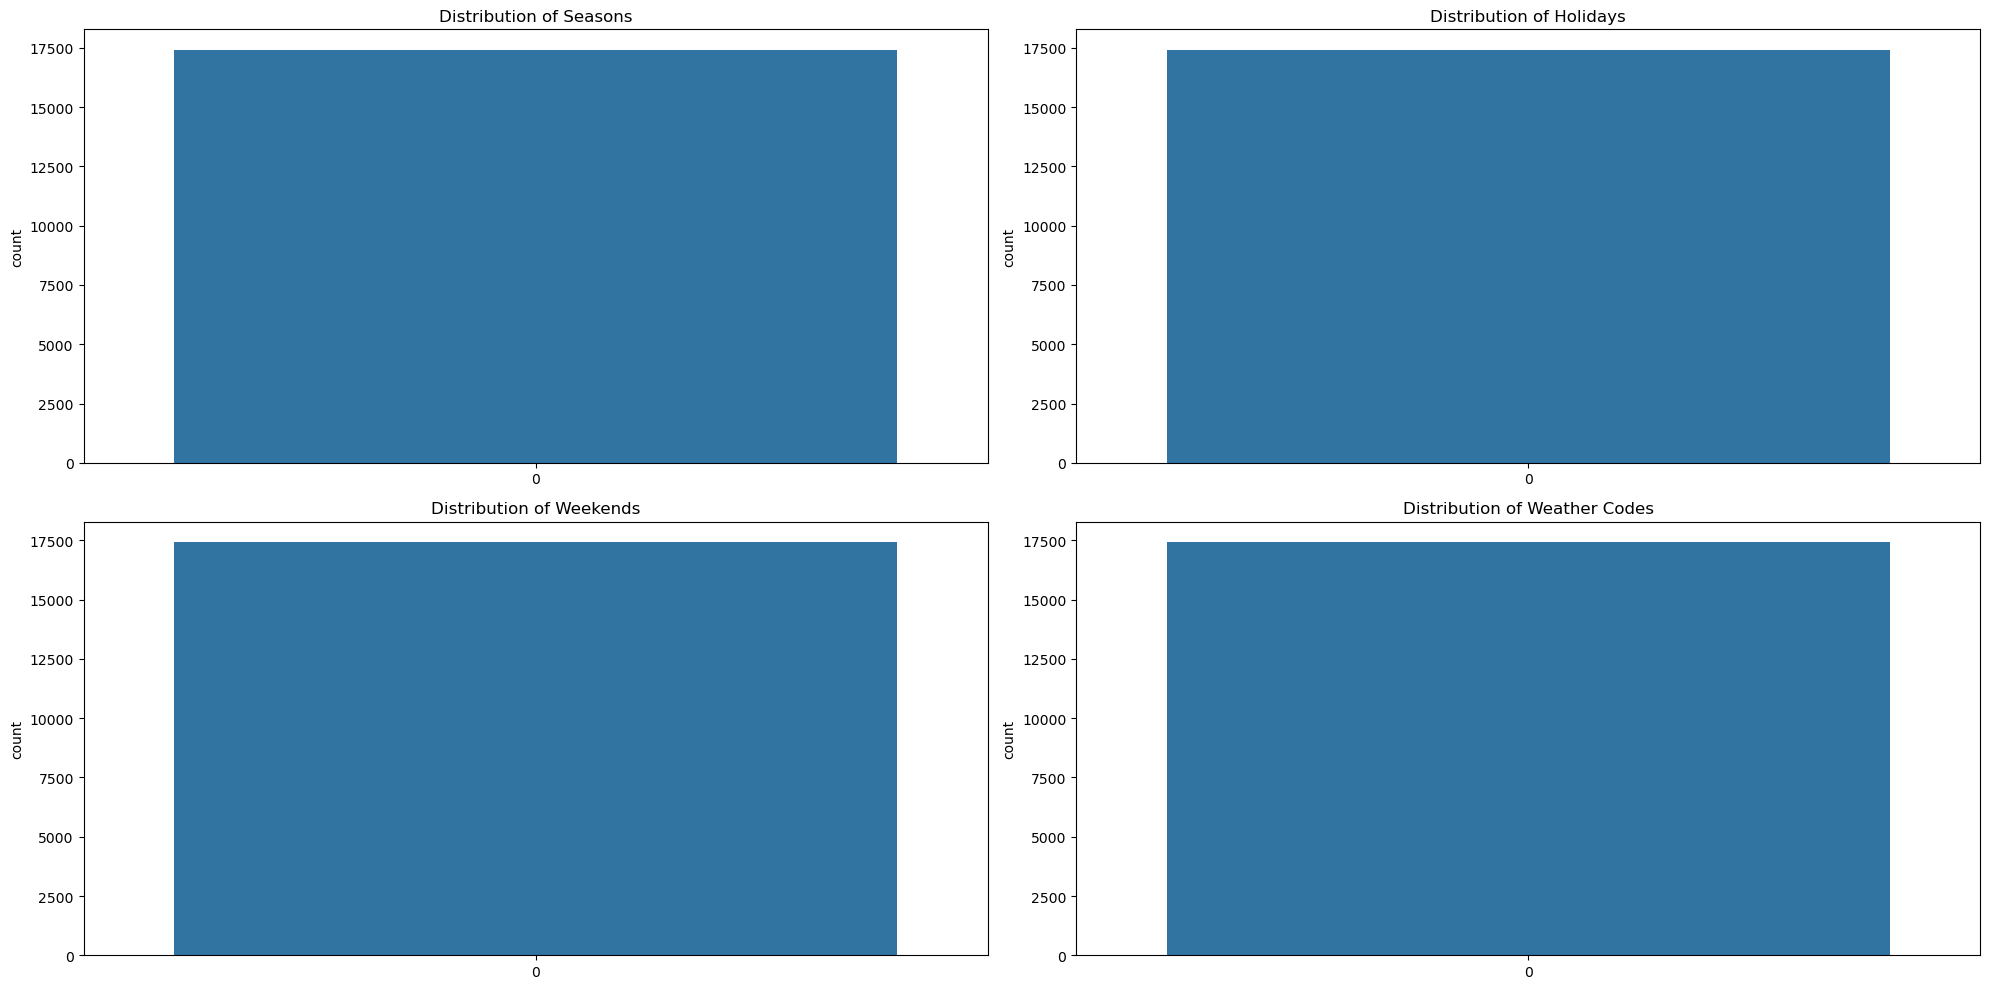

In [13]:
# Setting up the figure for plotting
plt.figure(figsize=(20, 10))

# Plotting distribution of 'Season' 
plt.subplot(2, 2, 1)
sns.countplot(df['season'])
plt.title('Distribution of Seasons')

# Plotting distribution of 'Holiday'
plt.subplot(2, 2, 2)
sns.countplot(df['is_holiday'])
plt.title('Distribution of Holidays')

# Plotting distribution of 'Weekend'
plt.subplot(2, 2, 3)
sns.countplot(df['is_weekend'])
plt.title('Distribution of Weekends')

# Plotting distribution of 'Weather Code' 
plt.subplot(2, 2, 4)
sns.countplot(df['weather_code'])
plt.title('Distribution of Weather Codes')

plt.tight_layout()
plt.show()


# weather_code
sns.countplot(x='weather_code',data=df)

1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
2 = scattered clouds / few clouds
3 = Broken clouds
4 = Cloudy
7 = Rain/ light Rain shower/ Light rain
10 = rain with thunderstorm
26 = snowfall
94 = Freezing Fog

<div class="alert alert-warning alert-info">
<span style=" color:red">5. Look at the data type of each variable, transform timestamp in type, and set it as index.
</span>

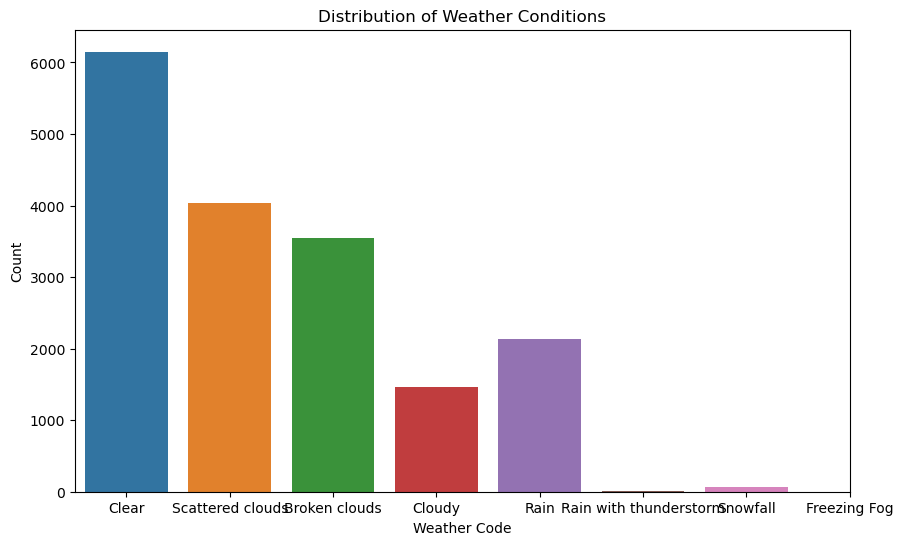

In [19]:
weather_labels = {1: 'Clear', 2: 'Scattered clouds', 3: 'Broken clouds', 
                  4: 'Cloudy', 7: 'Rain', 10: 'Rain with thunderstorm', 
                  26: 'Snowfall', 94: 'Freezing Fog'}

plt.figure(figsize=(10, 6))
sns.countplot(x='weather_code', data=df)
plt.title('Distribution of Weather Conditions')
plt.xlabel('Weather Code')
plt.ylabel('Count')
plt.xticks(ticks=range(len(weather_labels)), labels=weather_labels.values())
plt.show()


In [20]:
# Convert 'timestamp' to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Set 'timestamp' as the index
df.set_index('timestamp', inplace=True)


In [22]:
data_types = df.dtypes
data_types

cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

<div class="alert alert-warning alert-info">
<span style=" color:red">6. Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)
</span>

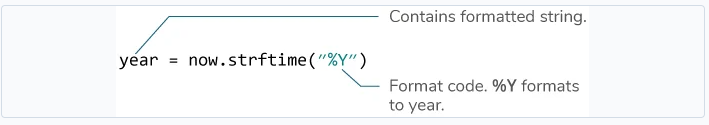

In [23]:
# Assuming df['timestamp'] has already been converted to datetime and set as index

# Extract day of the week
df['day_of_week'] = df.index.dayofweek  # Monday=0, Sunday=6

# Extract day of the month
df['day_of_month'] = df.index.day

# Extract hour
df['hour'] = df.index.hour

# Extract month
df['month'] = df.index.month

# Season and year might already be in the data, but if we need to extract year:
df['year'] = df.index.year

# The 'season' column might need mapping if it's not already descriptive
# For example, if you have a numeric representation of seasons, you could map it like this:
season_map = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
df['season_name'] = df['season'].map(season_map)


In [25]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,day_of_week,day_of_month,hour,month,year,season_name
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,6,4,0,1,2015,Summer
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,6,4,1,1,2015,Summer
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,6,4,2,1,2015,Summer
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,6,4,3,1,2015,Summer
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,6,4,4,1,2015,Summer


<div class="alert alert-warning alert-info">
<span style=" color:red">7. Visualize the correlation with a heatmap
</span>

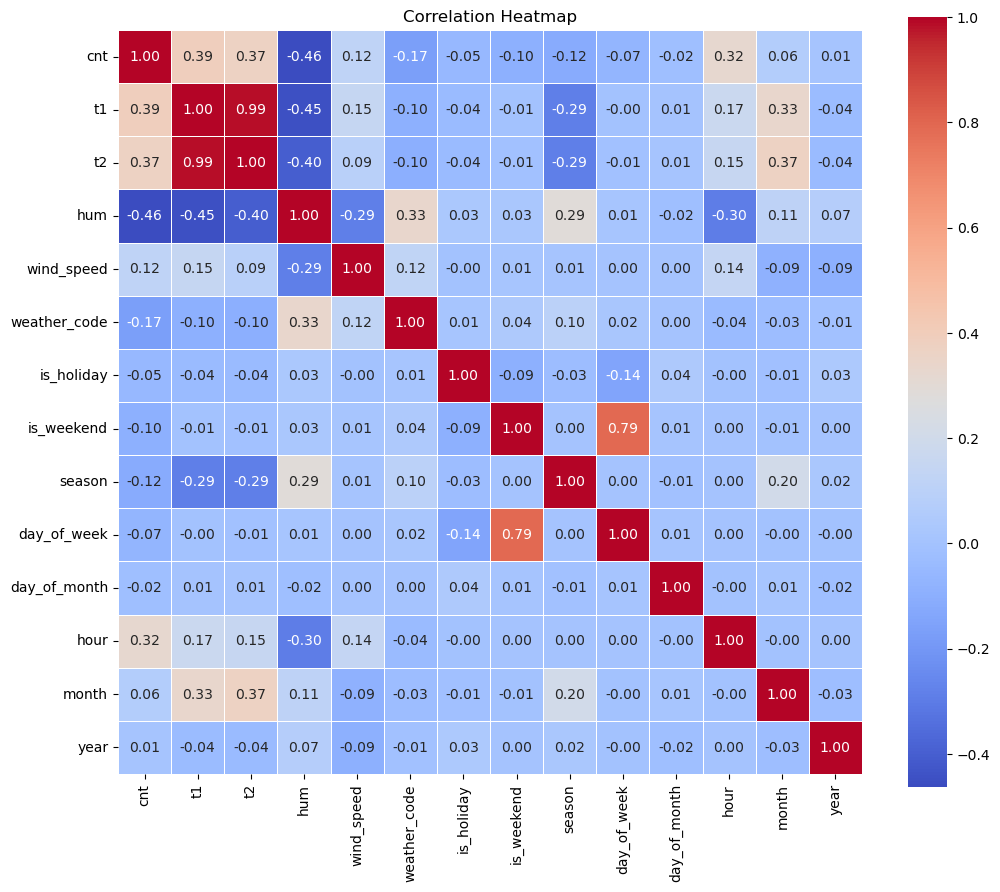

In [28]:
import numpy as np

# Remove non-numeric columns (example: 'season_name' if it exists)
df_numeric = df.select_dtypes(include=[np.number])

# Now you can compute the correlation matrix
corr = df_numeric.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.title('Correlation Heatmap')

# Show the plot
plt.show()


<div class="alert alert-warning alert-info">
<span style=" color:red">8. Visualize the correlation of the target variable and the other features with barplot
</span>

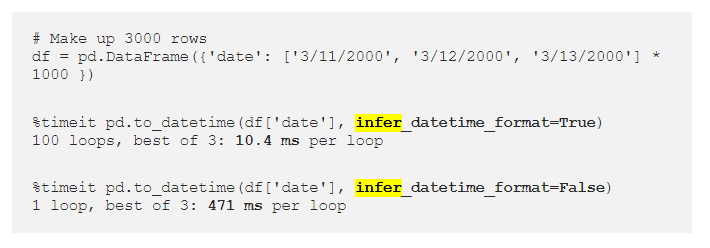

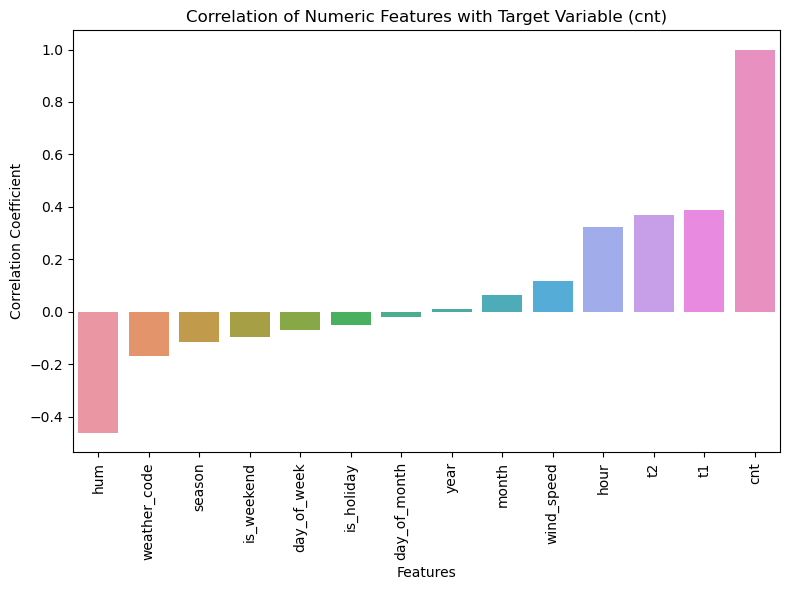

In [32]:

# Select only numeric columns for correlation to avoid the ValueError
numeric_cols = df.select_dtypes(include=[np.number])
corr_target_numeric = numeric_cols.corr()['cnt'].sort_values()

# Set up the matplotlib figure for the barplot
plt.figure(figsize=(8, 6))

# Create a barplot for the numeric correlations with the target variable
sns.barplot(x=corr_target_numeric.index, y=corr_target_numeric.values)

# Rotate x labels for better readability
plt.xticks(rotation=90)

# Set the title and labels
plt.title('Correlation of Numeric Features with Target Variable (cnt)')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')

# Show the plot
plt.tight_layout()  # Adjust layout for better fit
plt.show()


<div class="alert alert-warning alert-info">
<span style=" color:red">9. Plot bike shares over time use lineplot.
</span>

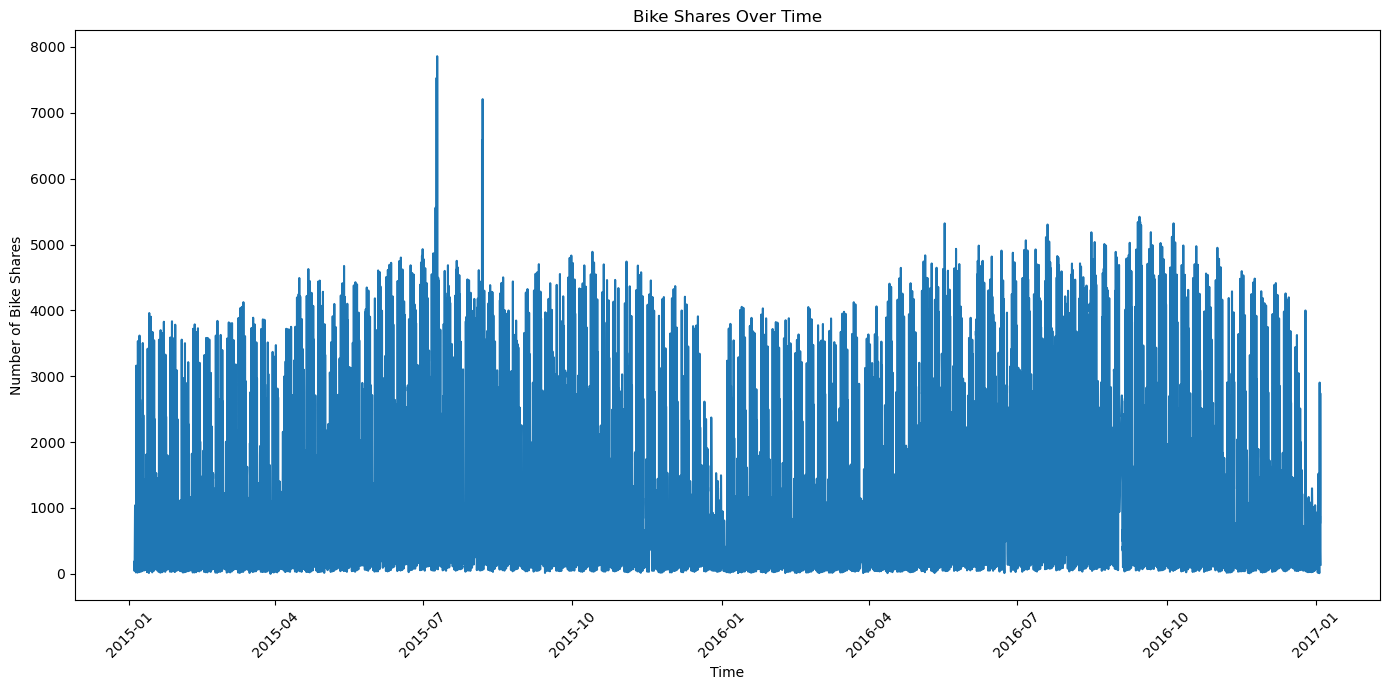

In [33]:
# Reset the index to use 'timestamp' in the plot
df_reset = df.reset_index()

# Set up the matplotlib figure
plt.figure(figsize=(14, 7))

# Create a line plot for bike shares over time
sns.lineplot(x='timestamp', y='cnt', data=df_reset)

# Set the title and labels
plt.title('Bike Shares Over Time')
plt.ylabel('Number of Bike Shares')
plt.xlabel('Time')

# Rotate x labels for better readability if necessary
plt.xticks(rotation=45)

plt.tight_layout()  # Adjust layout for better fit
plt.show()


<div class="alert alert-warning alert-info">
<span style=" color:red">10. Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot).
</span>

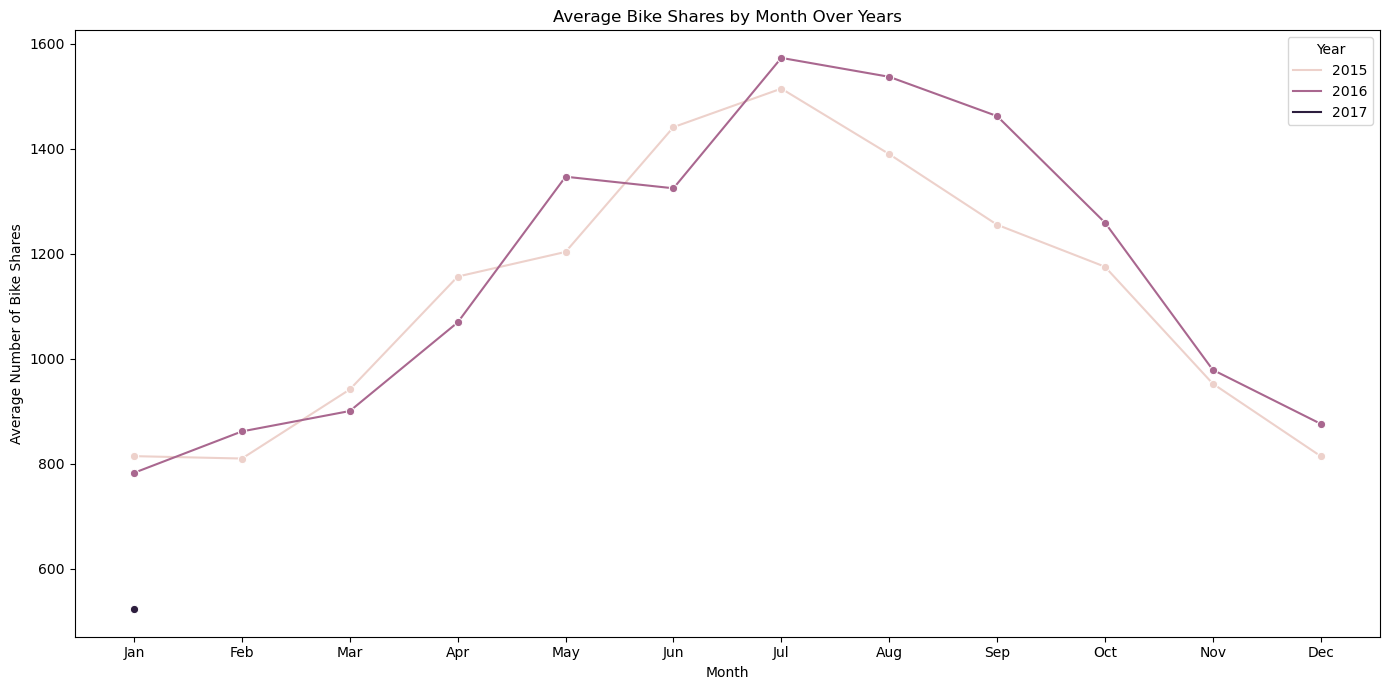

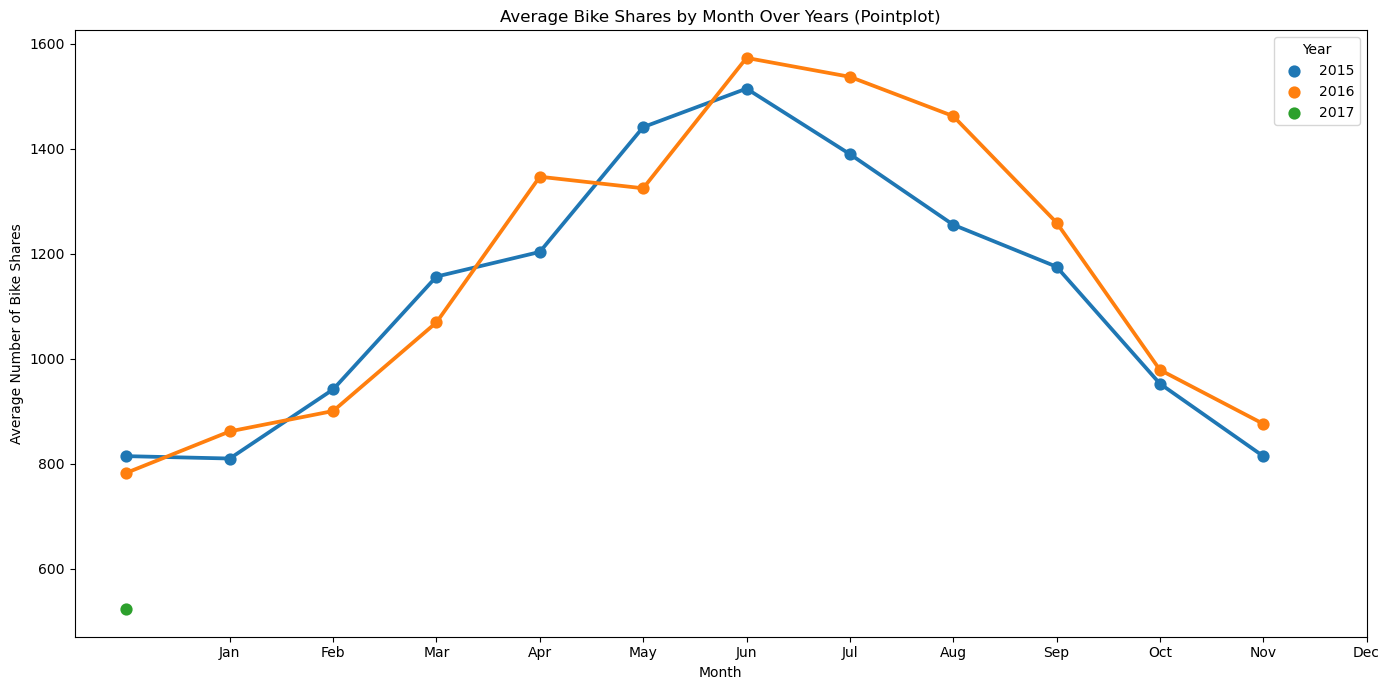

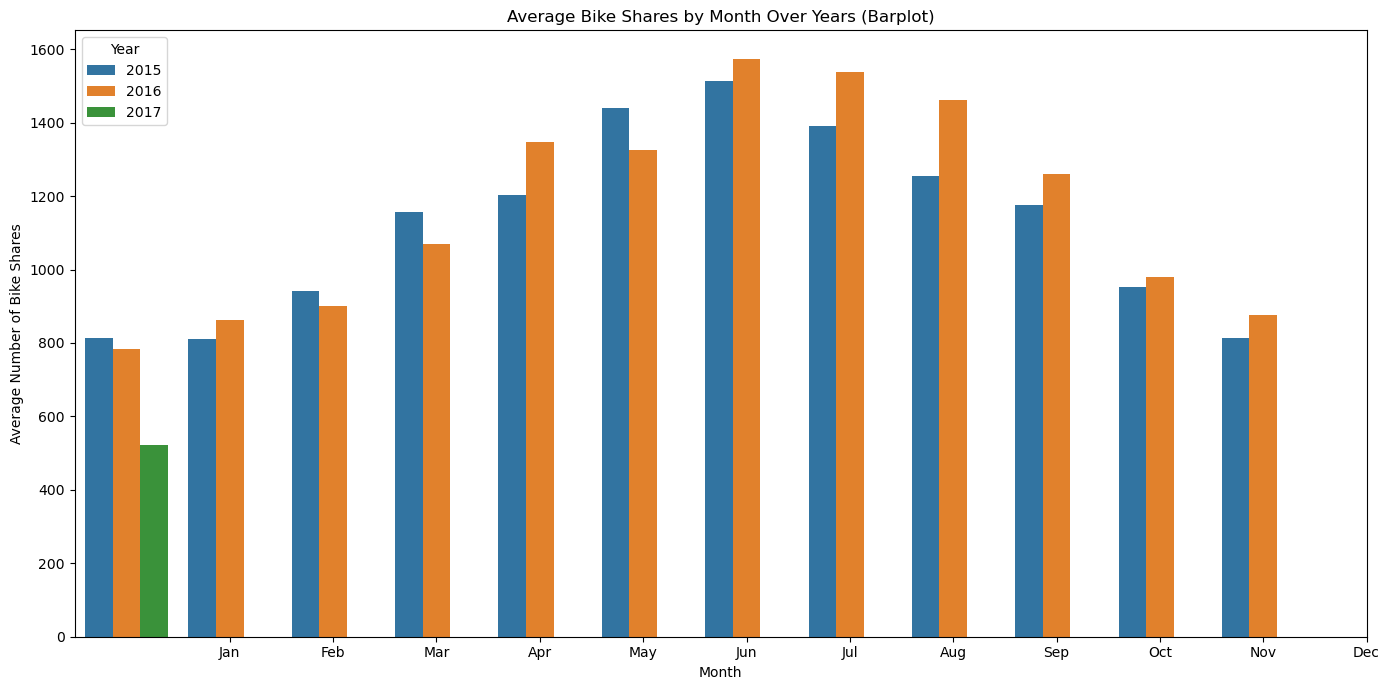

In [34]:
# Extract year and month from the timestamp for grouping
df_reset['year'] = df_reset['timestamp'].dt.year
df_reset['month'] = df_reset['timestamp'].dt.month

# Group by year and month to get the average bike shares per month
monthly_shares = df_reset.groupby(['year', 'month'])['cnt'].mean().reset_index()

# Set up the matplotlib figure
plt.figure(figsize=(14, 7))

# Create a line plot for bike shares by month and year
sns.lineplot(x='month', y='cnt', hue='year', data=monthly_shares, marker='o')

# Set the title and labels
plt.title('Average Bike Shares by Month Over Years')
plt.ylabel('Average Number of Bike Shares')
plt.xlabel('Month')

# Rotate x labels for better readability if necessary
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.legend(title='Year')
plt.tight_layout()  # Adjust layout for better fit
plt.show()

# Pointplot for the same data
plt.figure(figsize=(14, 7))
sns.pointplot(x='month', y='cnt', hue='year', data=monthly_shares)

plt.title('Average Bike Shares by Month Over Years (Pointplot)')
plt.ylabel('Average Number of Bike Shares')
plt.xlabel('Month')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.legend(title='Year')
plt.tight_layout()
plt.show()

# Barplot for the same data
plt.figure(figsize=(14, 7))
sns.barplot(x='month', y='cnt', hue='year', data=monthly_shares)

plt.title('Average Bike Shares by Month Over Years (Barplot)')
plt.ylabel('Average Number of Bike Shares')
plt.xlabel('Month')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.legend(title='Year')
plt.tight_layout()
plt.show()


<div class="alert alert-warning alert-info">
<span style=" color:red">11. Plot bike shares by hours on (holidays, weekend, season).
</span>

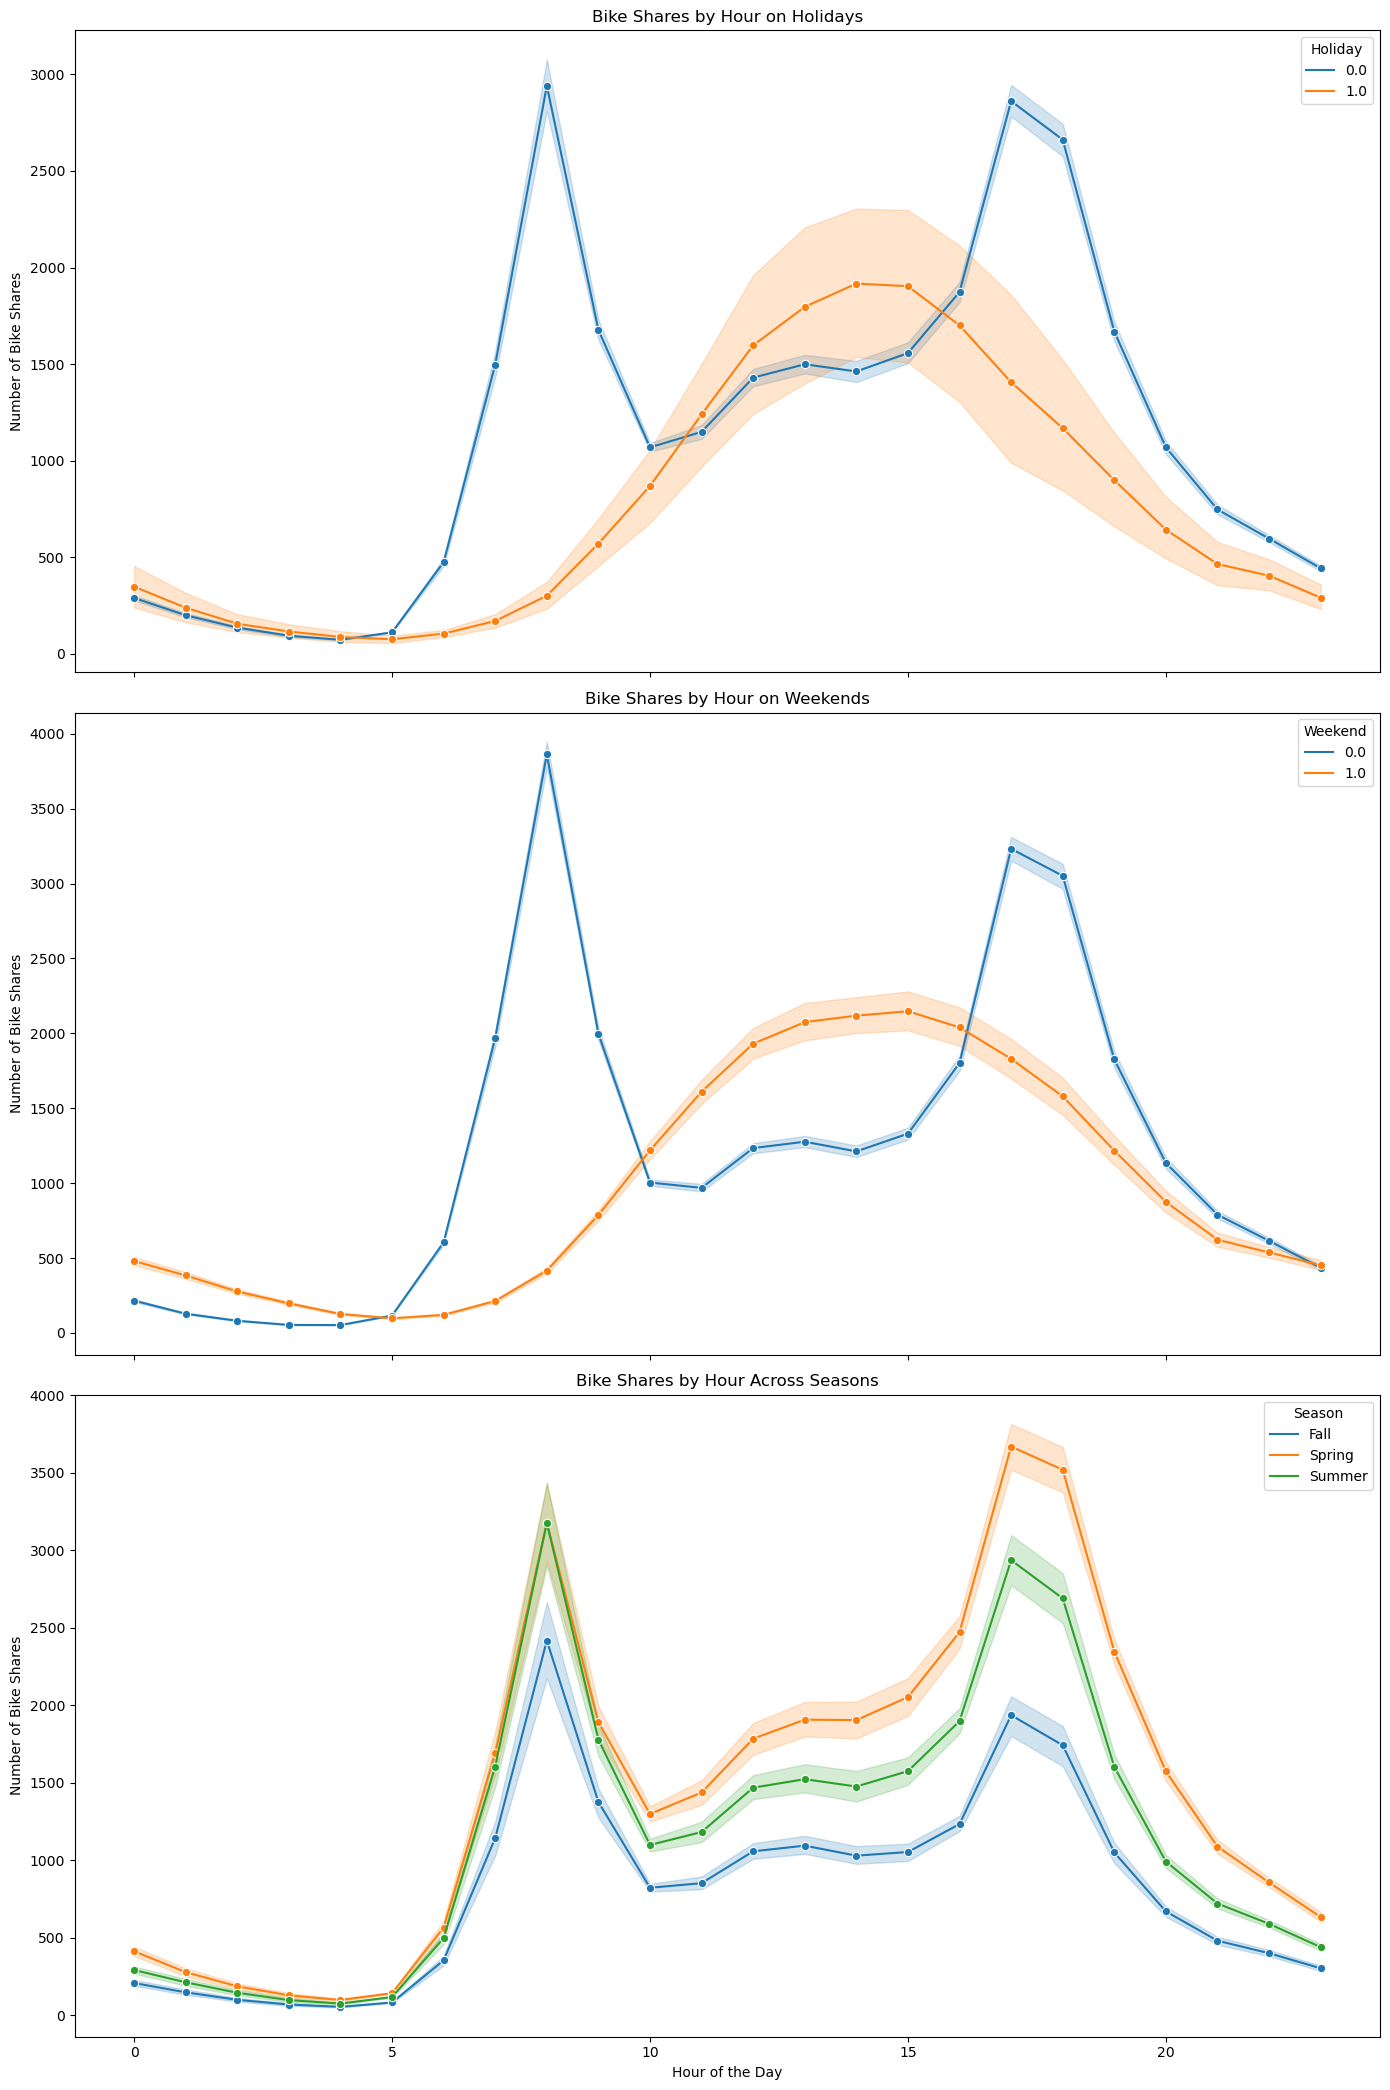

In [35]:
# Extract hour from the timestamp for grouping
df_reset['hour'] = df_reset['timestamp'].dt.hour

# Set up the matplotlib figure
fig, axes = plt.subplots(3, 1, figsize=(14, 21), sharex=True)

# Create a line plot for bike shares by hour on holidays
sns.lineplot(ax=axes[0], x='hour', y='cnt', hue='is_holiday', data=df_reset, marker='o')
axes[0].set_title('Bike Shares by Hour on Holidays')
axes[0].set_ylabel('Number of Bike Shares')
axes[0].set_xlabel('Hour of the Day')
axes[0].legend(title='Holiday')

# Create a line plot for bike shares by hour on weekends
sns.lineplot(ax=axes[1], x='hour', y='cnt', hue='is_weekend', data=df_reset, marker='o')
axes[1].set_title('Bike Shares by Hour on Weekends')
axes[1].set_ylabel('Number of Bike Shares')
axes[1].set_xlabel('Hour of the Day')
axes[1].legend(title='Weekend')

# Create a line plot for bike shares by hour across seasons
# Mapping the 'season' column to actual season names for better readability in the plot
season_mapping = {1.0: 'Spring', 2.0: 'Summer', 3.0: 'Fall', 4.0: 'Winter'}
df_reset['season_name'] = df_reset['season'].map(season_mapping)

sns.lineplot(ax=axes[2], x='hour', y='cnt', hue='season_name', data=df_reset, marker='o')
axes[2].set_title('Bike Shares by Hour Across Seasons')
axes[2].set_ylabel('Number of Bike Shares')
axes[2].set_xlabel('Hour of the Day')
axes[2].legend(title='Season')

plt.tight_layout()
plt.show()


<div class="alert alert-warning alert-info">
<span style=" color:red"> 12. Plot bike shares by day of week.

- You may want to see whether it is a holiday or not
</span>

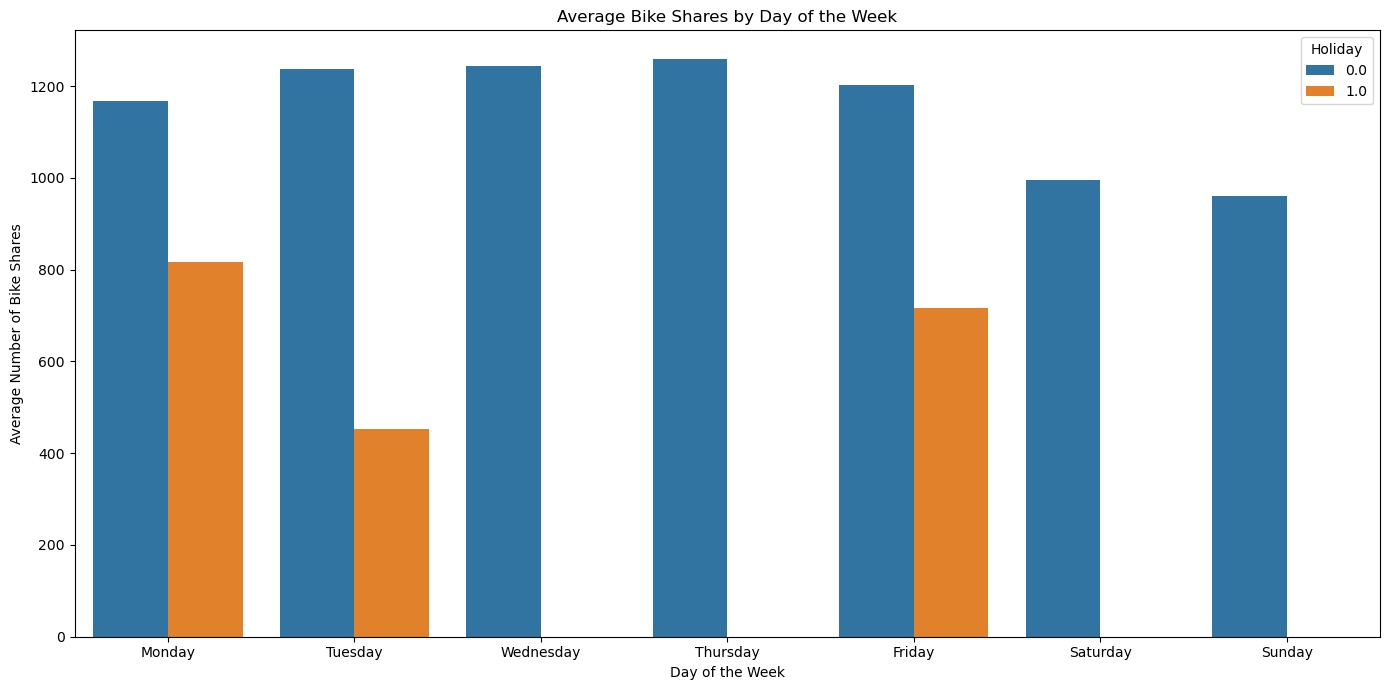

In [36]:
# Extract day of the week from the timestamp for grouping
df_reset['day_of_week'] = df_reset['timestamp'].dt.dayofweek  # Monday=0, Sunday=6

# Group by day of the week and holiday status to get the average bike shares
weekly_shares = df_reset.groupby(['day_of_week', 'is_holiday'])['cnt'].mean().reset_index()

# Set up the matplotlib figure
plt.figure(figsize=(14, 7))

# Create a bar plot for bike shares by day of the week with hue for holidays
sns.barplot(x='day_of_week', y='cnt', hue='is_holiday', data=weekly_shares)

# Set the title and labels
plt.title('Average Bike Shares by Day of the Week')
plt.ylabel('Average Number of Bike Shares')
plt.xlabel('Day of the Week')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Adding a legend
plt.legend(title='Holiday', loc='upper right')

plt.tight_layout()  # Adjust layout for better fit
plt.show()


<div class="alert alert-warning alert-info">
<span style=" color:red"> 13. Plot bike shares by day of month
</span>

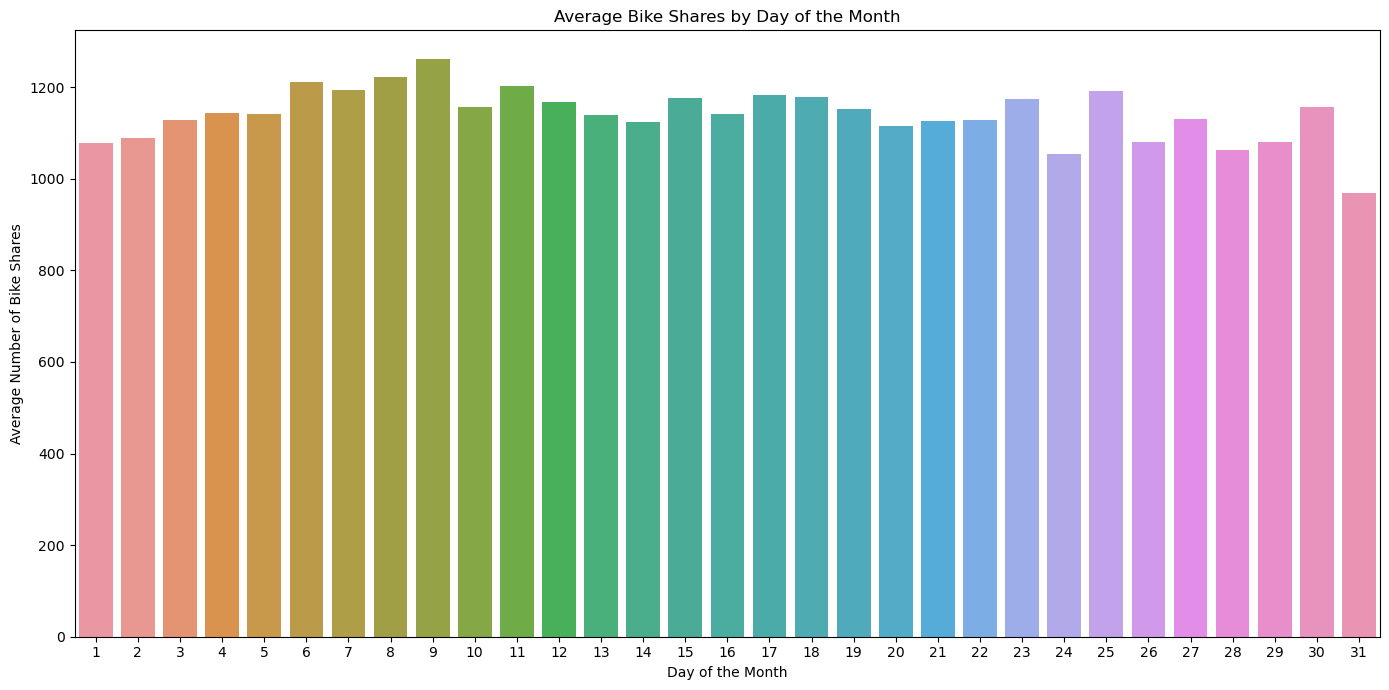

In [37]:
# Extract day of the month from the timestamp for grouping
df_reset['day_of_month'] = df_reset['timestamp'].dt.day

# Group by day of the month to get the average bike shares
monthly_day_shares = df_reset.groupby('day_of_month')['cnt'].mean().reset_index()

# Set up the matplotlib figure
plt.figure(figsize=(14, 7))

# Create a bar plot for bike shares by day of the month
sns.barplot(x='day_of_month', y='cnt', data=monthly_day_shares)

# Set the title and labels
plt.title('Average Bike Shares by Day of the Month')
plt.ylabel('Average Number of Bike Shares')
plt.xlabel('Day of the Month')

plt.tight_layout()  # Adjust layout for better fit
plt.show()


<div class="alert alert-warning alert-info">
<span style=" color:red"> 14. Plot bike shares by year

- Plot bike shares on holidays by seasons
</span>

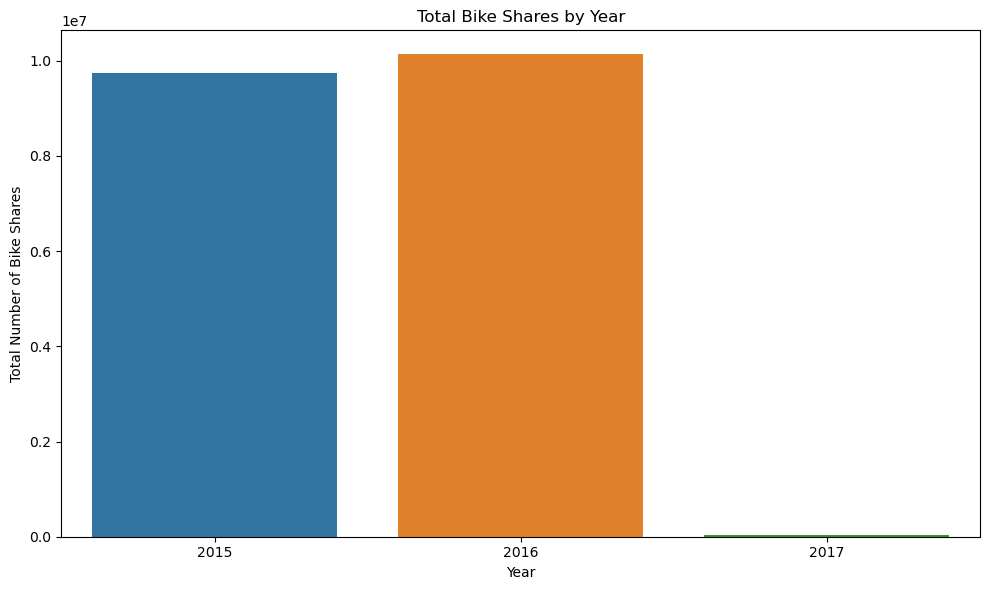

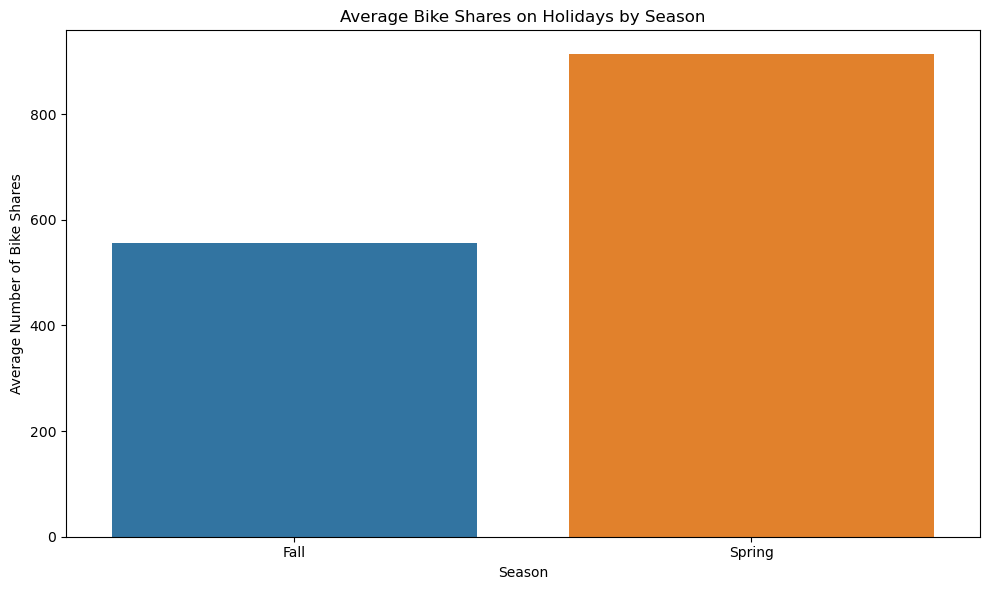

In [38]:
# Group by year to get the total bike shares
yearly_shares = df_reset.groupby('year')['cnt'].sum().reset_index()

# Set up the matplotlib figure for yearly shares
plt.figure(figsize=(10, 6))

# Create a bar plot for bike shares by year
sns.barplot(x='year', y='cnt', data=yearly_shares)

# Set the title and labels
plt.title('Total Bike Shares by Year')
plt.ylabel('Total Number of Bike Shares')
plt.xlabel('Year')

plt.tight_layout()  # Adjust layout for better fit
plt.show()

# Group by season and holiday to get the average bike shares on holidays by seasons
holiday_season_shares = df_reset[df_reset['is_holiday'] == 1].groupby('season_name')['cnt'].mean().reset_index()

# Set up the matplotlib figure for holiday season shares
plt.figure(figsize=(10, 6))

# Create a bar plot for bike shares on holidays by seasons
sns.barplot(x='season_name', y='cnt', data=holiday_season_shares)

# Set the title and labels
plt.title('Average Bike Shares on Holidays by Season')
plt.ylabel('Average Number of Bike Shares')
plt.xlabel('Season')

plt.tight_layout()  # Adjust layout for better fit
plt.show()


<div class="alert alert-warning alert-info">
<span style=" color:red">15. Visualize the distribution of bike shares by weekday/weekend with piechart and barplot
</span>

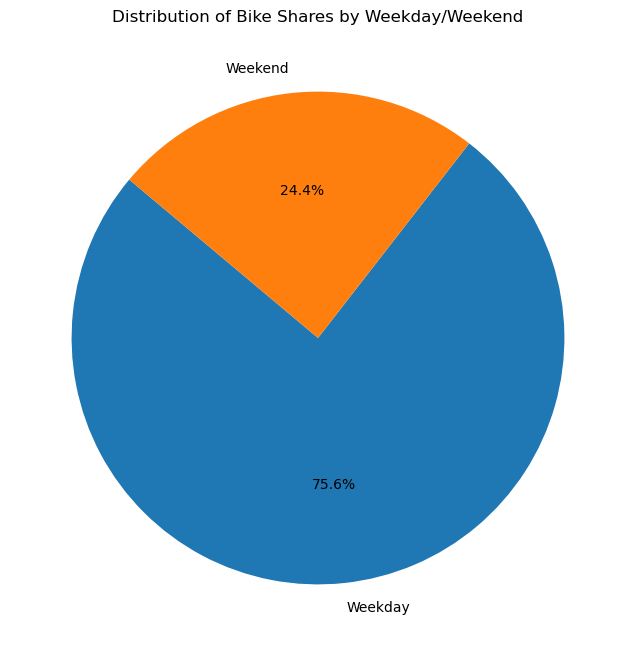

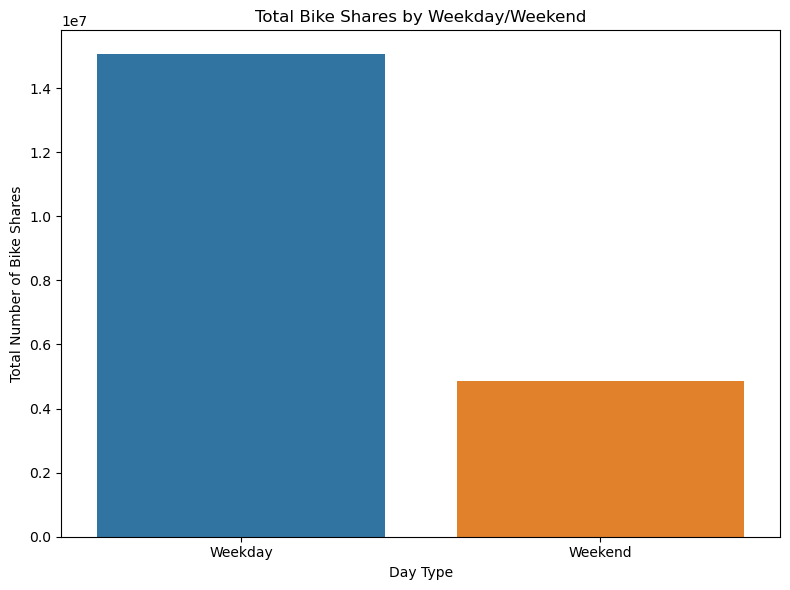

In [39]:
# Create a column that categorizes the data into 'Weekday' and 'Weekend'
df_reset['day_type'] = df_reset['is_weekend'].apply(lambda x: 'Weekend' if x == 1 else 'Weekday')

# Calculate the total bike shares for weekday and weekend
day_type_shares = df_reset.groupby('day_type')['cnt'].sum().reset_index()

# Set up the matplotlib figure for pie chart
plt.figure(figsize=(8, 8))

# Create a pie chart for bike shares by weekday/weekend
plt.pie(day_type_shares['cnt'], labels=day_type_shares['day_type'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Bike Shares by Weekday/Weekend')

plt.show()

# Set up the matplotlib figure for bar plot
plt.figure(figsize=(8, 6))

# Create a bar plot for bike shares by weekday/weekend
sns.barplot(x='day_type', y='cnt', data=day_type_shares)

# Set the title and labels
plt.title('Total Bike Shares by Weekday/Weekend')
plt.ylabel('Total Number of Bike Shares')
plt.xlabel('Day Type')

plt.tight_layout()  # Adjust layout for better fit
plt.show()


<div class="alert alert-warning alert-info">
<span style=" color:red">16. Plot the distribution of weather code by seasons
</span>

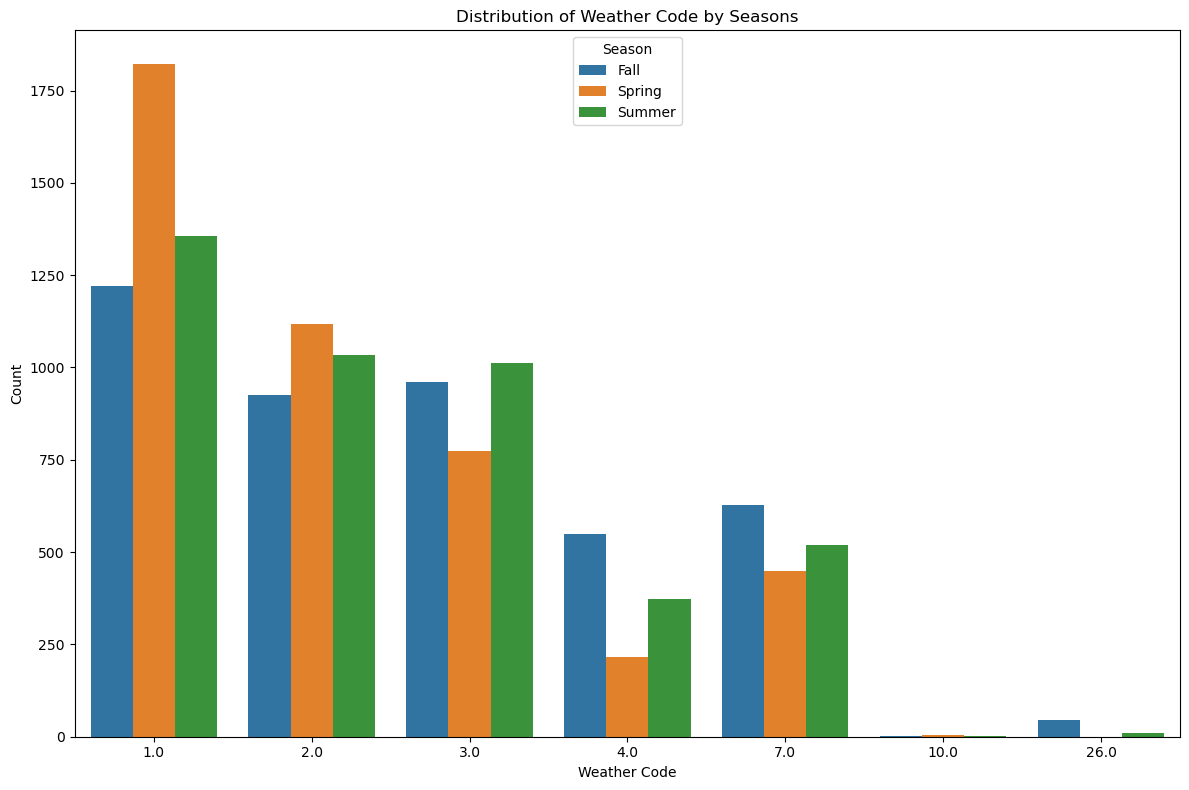

In [40]:
# Group by season and weather code to count the occurrences
weather_season_dist = df_reset.groupby(['season_name', 'weather_code']).size().reset_index(name='count')

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a bar plot for the distribution of weather code by seasons
sns.barplot(x='weather_code', y='count', hue='season_name', data=weather_season_dist)

# Set the title and labels
plt.title('Distribution of Weather Code by Seasons')
plt.ylabel('Count')
plt.xlabel('Weather Code')

# Adding a legend
plt.legend(title='Season')

plt.tight_layout()  # Adjust layout for better fit
plt.show()


<div class="alert alert-info alert-info ">

# <span style=" color:red">Conclusions
    

    

</span>

The analysis provided comprehensive data on factors affecting the use of bikesharing, which demonstrated its importance in terms of time and environment as regards usage patterns. In order to optimise their services and to understand trends in mobility, bike sharing providers and city planners can benefit from this information.